# Simple EDA data video game sales

## Info

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

    Rank - Ranking of overall sales
    Name - The games name
    Platform - Platform of the games release (i.e. PC,PS4, etc.)
    Year - Year of the game's release
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

Acesso: 03/07/2020
Link:https://www.kaggle.com/gregorut/videogamesales

In [72]:

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()



In [2]:

#importing data
data = pd.read_csv('./data/vgsales.csv')

In [3]:
# 5 first lines
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# simple info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Looking values nan
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# Looking column "Year"

data['Year']


0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

Abaixo é criada uma nova coluna chamada year em que contém as datas, anos, no formato datetime. 

In [7]:

# converte os valores, Float64, da coluna "Year" para datetime 
def to_formatData(x):
    if(not np.isnan(x)):
        x = int(x)
        date = pd.to_datetime(x, yearfirst=True, format="%Y")
        return date

# criando nova coluna "year" com valores de "Year" convertidos para datetime
data['year'] = data['Year'].apply(to_formatData)

In [8]:

# new data
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2006-01-01
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985-01-01
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2008-01-01
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2009-01-01
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1996-01-01


In [9]:

# Imprimindo o primeiro e último ano de registro (intervalo de anos)

print('Data mínima: ', data['year'].min())
print('Data maxíma: ', data['year'].max())

Data mínima:  1980-01-01 00:00:00
Data maxíma:  2020-01-01 00:00:00


In [10]:

# verificando coluna "Name"

#data['Name'].unique().shape
data['Name'].value_counts()

Need for Speed: Most Wanted       12
Ratatouille                        9
Madden NFL 07                      9
FIFA 14                            9
LEGO Marvel Super Heroes           9
                                  ..
My Fitness Coach                   1
Game & Watch Gallery 4             1
Famicom Mini: Adventure Island     1
Caesar III                         1
Tycoon City: New York              1
Name: Name, Length: 11493, dtype: int64

Podemos ver que alguns títulos aparecem mais de uma vez.

In [11]:
data[data['Name'] == data['Name'].value_counts().index[0]] # imprimindo linhas em que "Name" = "Need for Speed: Most Wanted", para verificar os registros com mesmo "Name" 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,year
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37,2005-01-01
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89,2012-01-01
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58,2012-01-01
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29,2005-01-01
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16,2012-01-01
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04,2005-01-01
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56,2005-01-01
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30,2005-01-01
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28,2013-01-01
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27,2005-01-01


Podemos ver, aparentemente, que o motivo de alguns títulos se repetirem é devido a terem sido lançados em plataformas diferentes.

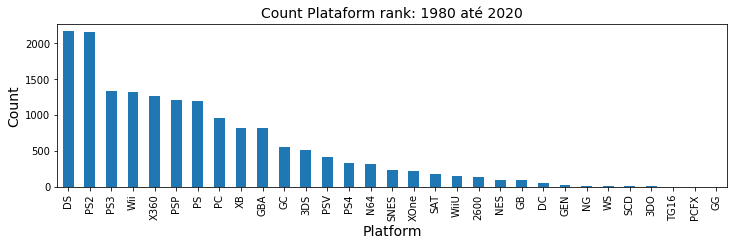

In [12]:

data['Platform'].value_counts().plot.bar(figsize=(12,3))
g = plt.gca()
g.set_title('Count Plataform rank: 1980 até 2020', size=14)
g.set_ylabel('Count', size=14)
g.set_xlabel('Platform', size=14)
plt.show()

Isso nos mostra que entre 1980 e 2020 o <b>DS</b> foi a plataforma que apresentou maior número de lançamentos.

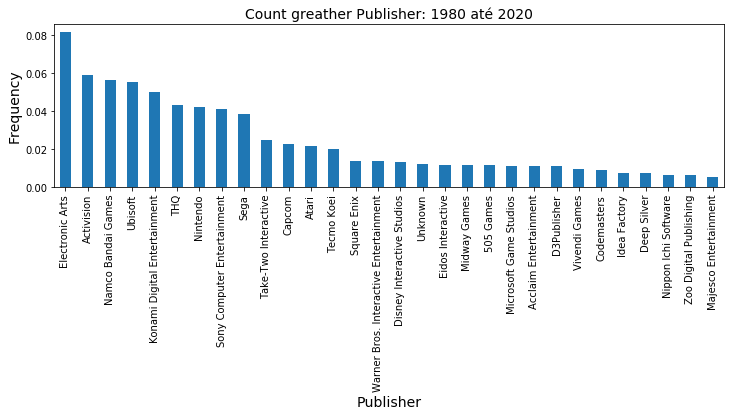

In [13]:

data['Publisher'].value_counts(normalize=True)[0:30].plot.bar(figsize=(12,3)) # 30 maiores publicadoras dos games
g = plt.gca()
g.set_title('Count greather Publisher: 1980 até 2020', size=14)
g.set_xlabel('Publisher', size=14)
g.set_ylabel('Frequency', size=14)
plt.show()

Podemos ver que entre 1980 e 2020 a <b>Electronic Arts</b> apresentou maior número de lançamentos, considerando plataformas diferentes.

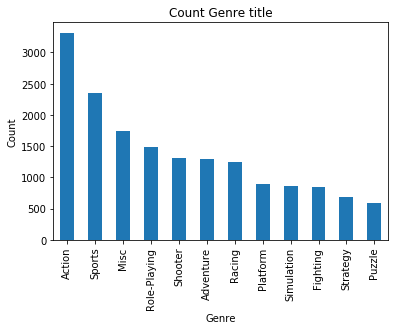

In [66]:

data['Genre'].value_counts().plot.bar()
g = plt.gca()
g.set_title('Count Genre title')
g.set_xlabel('Genre')
g.set_ylabel('Count')
plt.show()


Podemos observar, considerando os lançamentos, que entre 1980 e 2020 ocorreu maior número de lançamentos de jogos do gênero <b>Action</b>.

Abaixo criamos um novo dataFrame em que é deletado os registros que apresentam valores Nan e é colocado o ano como index em cada registro.

In [15]:

data2 = data.dropna() # apagando registros com Nan
data2 = data2.set_index(data2['year']);  # colocando index como a coluna 'year'
data2.drop(['Year','year'], inplace=True, axis=1) # deletando colunas 'Year' e 'year'

In [16]:
#data2.index.isna().sum()
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16291 entries, 2006-01-01 to 2003-01-01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
data2.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
year,,,,,,,,,,
2006-01-01,1,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1985-01-01,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2008-01-01,3,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2009-01-01,4,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
1996-01-01,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:

# realizando uma soma de todos os registros que apresentam o mesmo ano, dessa forma
# é possível verificar o total das vendas 'Global_Sales' por cada ano, abaixo é realiado uma plotagem
# do compartamento de 'Global_Sales' durante os anos.

globalSalesPerYear = data2['Global_Sales'].resample('Y').sum()
globalSalesPerYear

year
1980-12-31     11.38
1981-12-31     35.77
1982-12-31     28.86
1983-12-31     16.79
1984-12-31     50.36
1985-12-31     53.94
1986-12-31     37.07
1987-12-31     21.74
1988-12-31     47.22
1989-12-31     73.45
1990-12-31     49.39
1991-12-31     32.23
1992-12-31     76.16
1993-12-31     45.98
1994-12-31     79.17
1995-12-31     88.11
1996-12-31    199.15
1997-12-31    200.98
1998-12-31    256.47
1999-12-31    251.27
2000-12-31    201.56
2001-12-31    331.47
2002-12-31    395.52
2003-12-31    357.85
2004-12-31    414.01
2005-12-31    458.51
2006-12-31    521.04
2007-12-31    609.92
2008-12-31    678.90
2009-12-31    667.30
2010-12-31    600.29
2011-12-31    515.80
2012-12-31    363.49
2013-12-31    368.11
2014-12-31    337.03
2015-12-31    264.44
2016-12-31     70.90
2017-12-31      0.05
2018-12-31      0.00
2019-12-31      0.00
2020-12-31      0.29
Freq: A-DEC, Name: Global_Sales, dtype: float64

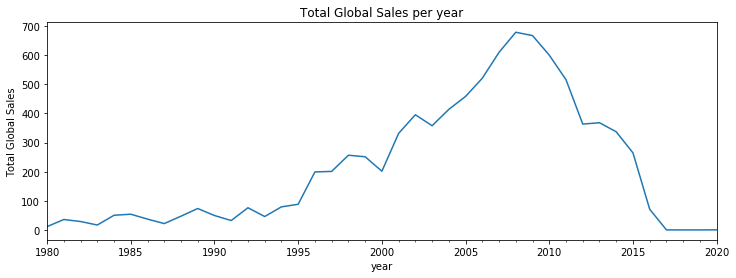

In [23]:
globalSalesPerYear.plot(figsize=(12,4))
g = plt.gca()
g.set_ylabel('Total Global Sales')
g.set_title('Total Global Sales per year')
plt.show()

Com base nas cécluas acima podemos observar que existe um pico nas vendas globais no ano de 2008, sendo que depois desse ano os valores caem rapídamente. 

In [20]:
data2[data2.index >= pd.to_datetime('2017')] # pegando todos os registros a partir do ano de 2017

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
year,,,,,,,,,,
2020-01-01,5959,Imagine: Makeup Artist,DS,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
2017-01-01,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
2017-01-01,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
2017-01-01,16441,Brothers Conflict: Precious Baby,PSV,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


É possível observar que a partir do ano de 2017 quase não é apresentado registros, o que pode revelar que o nosso conjunto de dados apresenta algum problema, podendo ter sido coletado de forma incorreta ou incompleta ou a partir de uma fonte viesada. Considerando isso, continuamos com outras informações que poderiamos querer a partir desse conjunto de dados.

Podemos pegar o título com maior venda em cada ano fazendo:

In [64]:

# considerando o ano de 2010, por exemplo

#m = data2[data2.index == pd.to_datetime('2006-01-01')]
#m[m['Global_Sales'] == m['Global_Sales'].max()]


# Intervalo de anos dentro dos dados. freq = 'YS' significa frequencia em anos, pegano o inicio do ano
# 'yearStart'. Experimente usar apenas freq = 'Y' para ver o resultado. Mais sobre esses detalhes em [2] e [3]
dateRange = pd.date_range('1980-01-01','2020-01-01', freq='YS'); #dateRange

In [63]:

# Títulos com maior venda em cada ano

MVendaPerYear = pd.DataFrame(columns=data2.columns)

for y in dateRange:
    temp = data2[data2.index == y] # seleciona os registros por ano
    MVendaPerYear = pd.concat([MVendaPerYear, temp[temp['Global_Sales'] == temp['Global_Sales'].max()]])
    
MVendaPerYear

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1980-01-01,259,Asteroids,2600,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1981-01-01,240,Pitfall!,2600,Platform,Activision,4.21,0.24,0.00,0.05,4.50
1982-01-01,90,Pac-Man,2600,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
1983-01-01,422,Baseball,NES,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
1984-01-01,10,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1985-01-01,2,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1986-01-01,128,The Legend of Zelda,NES,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
1987-01-01,252,Zelda II: The Adventure of Link,NES,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
1988-01-01,23,Super Mario Bros. 3,NES,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
1989-01-01,6,Tetris,GB,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


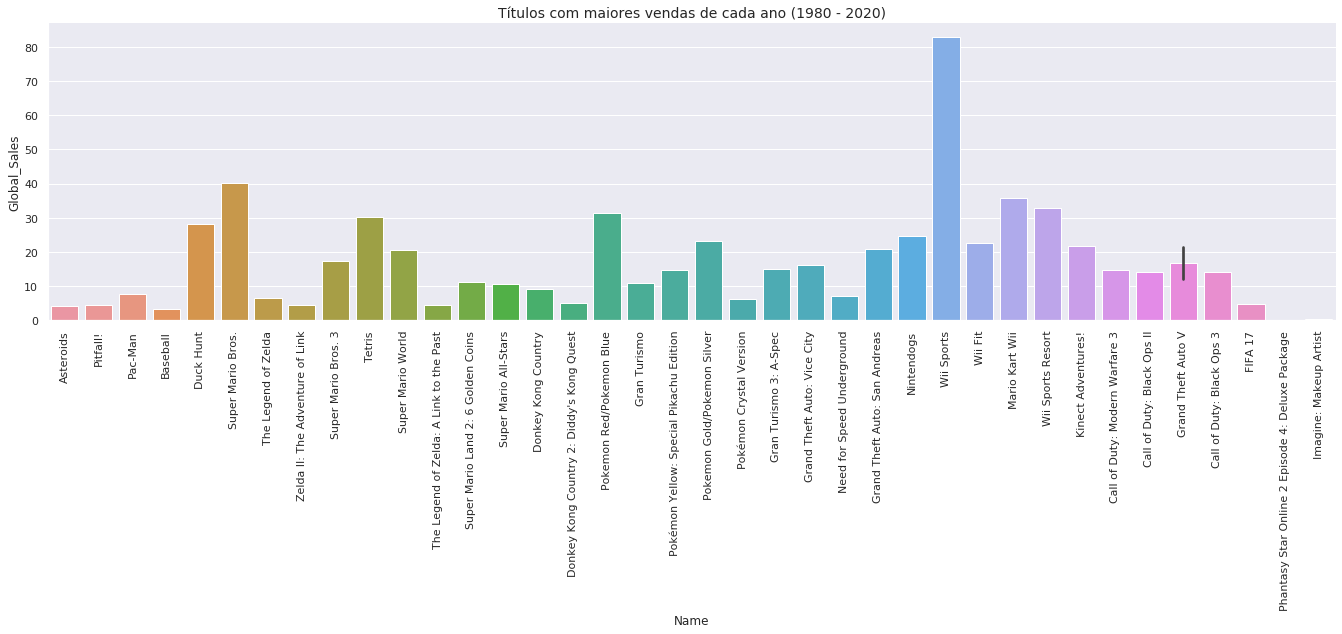

In [93]:

# resumindo dados acima
sns.catplot(x='Name', y='Global_Sales', data=MVendaPerYear, height=5, aspect=4, kind='bar')
g = plt.gca()
g.set_title('Títulos com maiores vendas de cada ano (1980 - 2020)', size=14)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1, 'Global Sales per Genre')

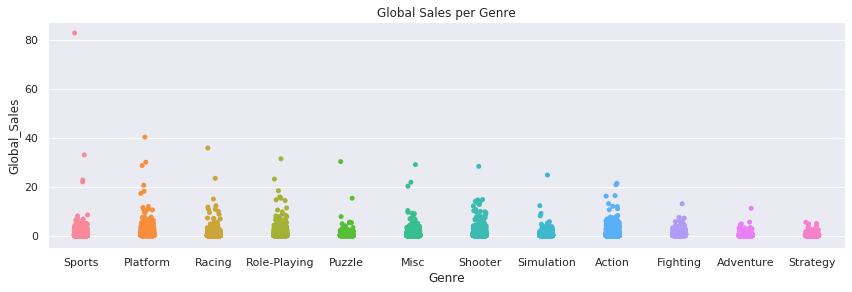

In [94]:
sns.catplot(x='Genre', y='Global_Sales', data=data2, height=4, aspect=3)
g = plt.gca()
g.set_title('Global Sales per Genre')

Text(0.5, 1, 'Global Sales per Platform')

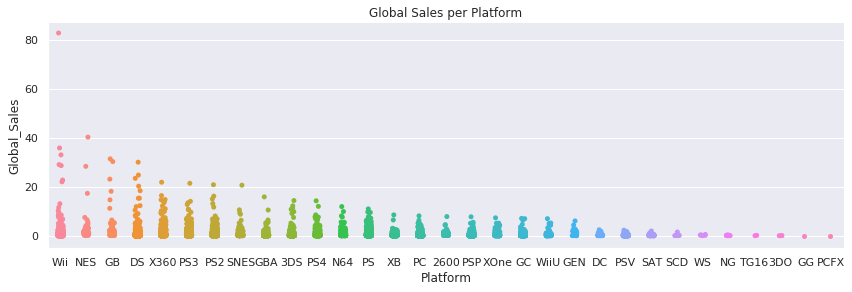

In [95]:
sns.catplot(x='Platform', y='Global_Sales', data=data2, height=4, aspect=3)
g = plt.gca()
g.set_title('Global Sales per Platform')

# References


[1]https://www.kaggle.com/gregorut/videogamesales
<br>
[2]https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
<br>
[3]https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
<br>
[4]https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
<br>
[5]https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib
<br>